This notebook shows some basic information about the train, validation and test sets

In [95]:
from dog_breed.data import analysis as da

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.style.use('seaborn')

# Load data

In [19]:
train = da.get_train_labels()
test = da.get_test_labels()
valid = da.get_valid_labels()

# Train, validation, test

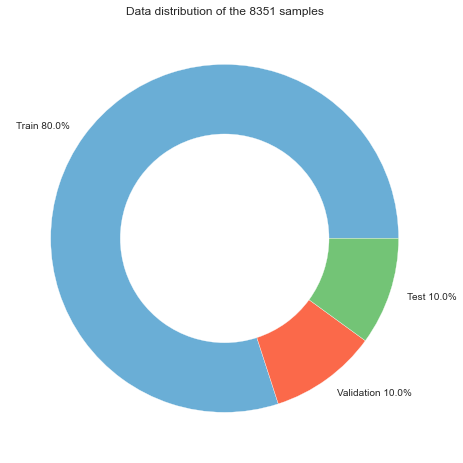

In [142]:
colors = [plt.cm.Blues, plt.cm.Reds, plt.cm.Greens]

inner_pie = [x.sum() for x in [train, valid, test]]
inner_sub_labels = ['Train', 'Validation', 'Test']
inner_perc = [f'{x / np.sum(inner_pie) * 100:3.1f}%' for x in inner_pie]
inner_labels = [f'{name} {perc}' for name, perc in zip(inner_sub_labels, inner_perc)]


fig, ax = plt.subplots(facecolor='w', figsize=(20, 8))
plt.title(f'Data distribution of the {np.sum(inner_pie)} samples')
inner_pie_graph, _ = ax.pie(inner_pie,
                            radius=1.3 - 0.3,
                            labels=inner_labels,
                            labeldistance=1.1,
                            colors=[x(0.5) for x in [*colors]],
                            )
plt.setp(inner_pie_graph, width=0.4, edgecolor='white')
plt.margins(0, 0)
plt.show()

#### Number of breeds for each data set
each dataset has the same number of breeds.
<br>
validation and test set do not introduce any new breed.
<br>
Predictions are possible for each breed of validation and test set.

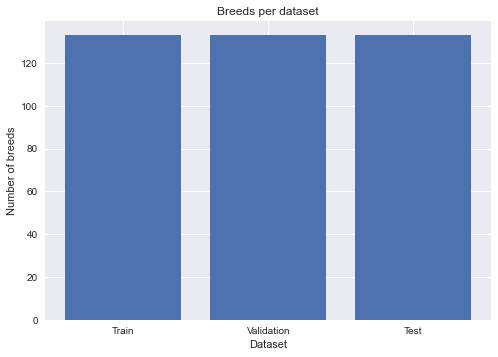

In [134]:
plt.bar(['Train', 'Validation', 'Test'], list(map(lambda x: len(x), [train, valid, test])))
plt.xlabel("Dataset")
plt.ylabel("Number of breeds")
plt.title("Breeds per dataset");

In [141]:
missing_valid = list(set(valid.index) - set(train.index))
missing_test = list(set(test.index) - set(train.index))
if all(len(x) == 0 for x in [missing_test, missing_valid]):
    print("All the breeds in the datasets are included in the training set")

All the breeds in the datasets are included in the training set


## Breeds' histogram
In the next section, histograms will show that the distribution of breeds of training, validation and test data is not unbalanced.

In [191]:
def breed_histogram(data: pd.Series, n_of_breeds=-1, top=True, **kwargs):
    """ Shows the histogram of the breeds in the database """
    ticks_max_length = 7 # maximum ticks' text length
    args_ticks = {'rotation': 80,
                 'fontsize': 18,
                 }
    
    if n_of_breeds == -1:
        subdata = data.reset_index()
    elif top:
        subdata = data.head(n_of_breeds).reset_index()
    else:
        subdata = data.tail(n_of_breeds).reset_index()
    data_to_plot = subdata[0]
    labels_to_plot = subdata['index']
    
    plt.figure(**kwargs)
    plt.title("Breeds' histogram")
    ax = plt.gca()
    sns.barplot(data=subdata, x='index', y=0, ax=plt.gca())
#     plt.plot(labels_to_plot, data_to_plot, '-o')
    ticks = labels_to_plot
    plt.xticks(range(len(ticks)), list(map(lambda x: x[: ticks_max_length], ticks)), **args_ticks);
    plt.xlabel("Breed")
    plt.ylabel("Nr. of samples")
    
args_figure = {'figsize': (30, 8)}

### Training

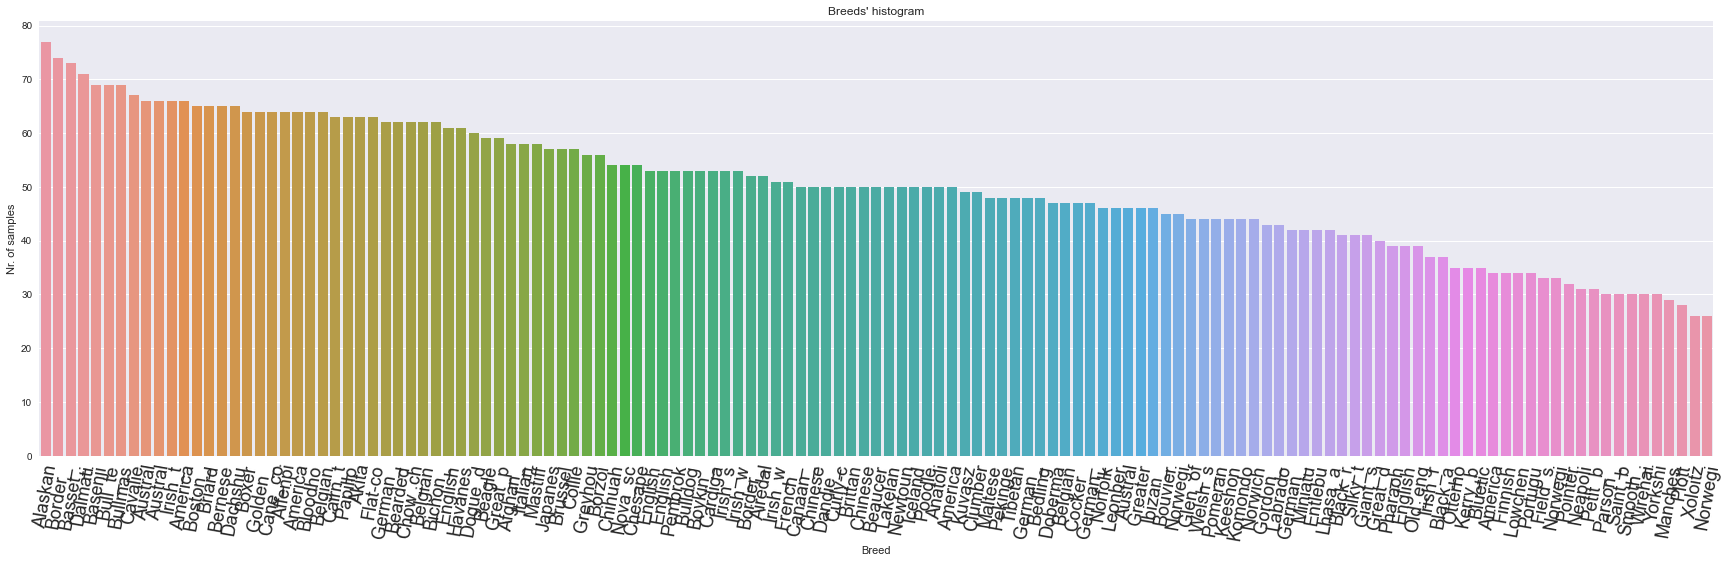

In [192]:
breed_histogram(train, **args_figure)

#### Most and least represented breeds

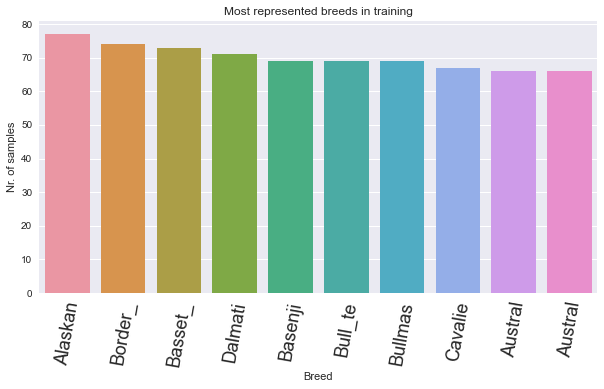

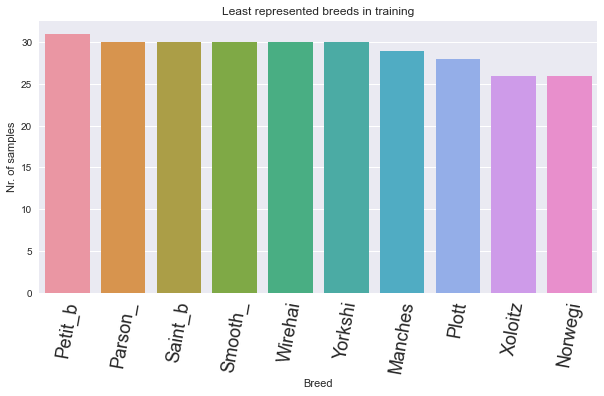

In [193]:
breed_histogram(train, 10, figsize=(10, 5))
plt.title("Most represented breeds in training")
breed_histogram(train, 10, top=False, figsize=(10, 5))
plt.title("Least represented breeds in training");

### Validation

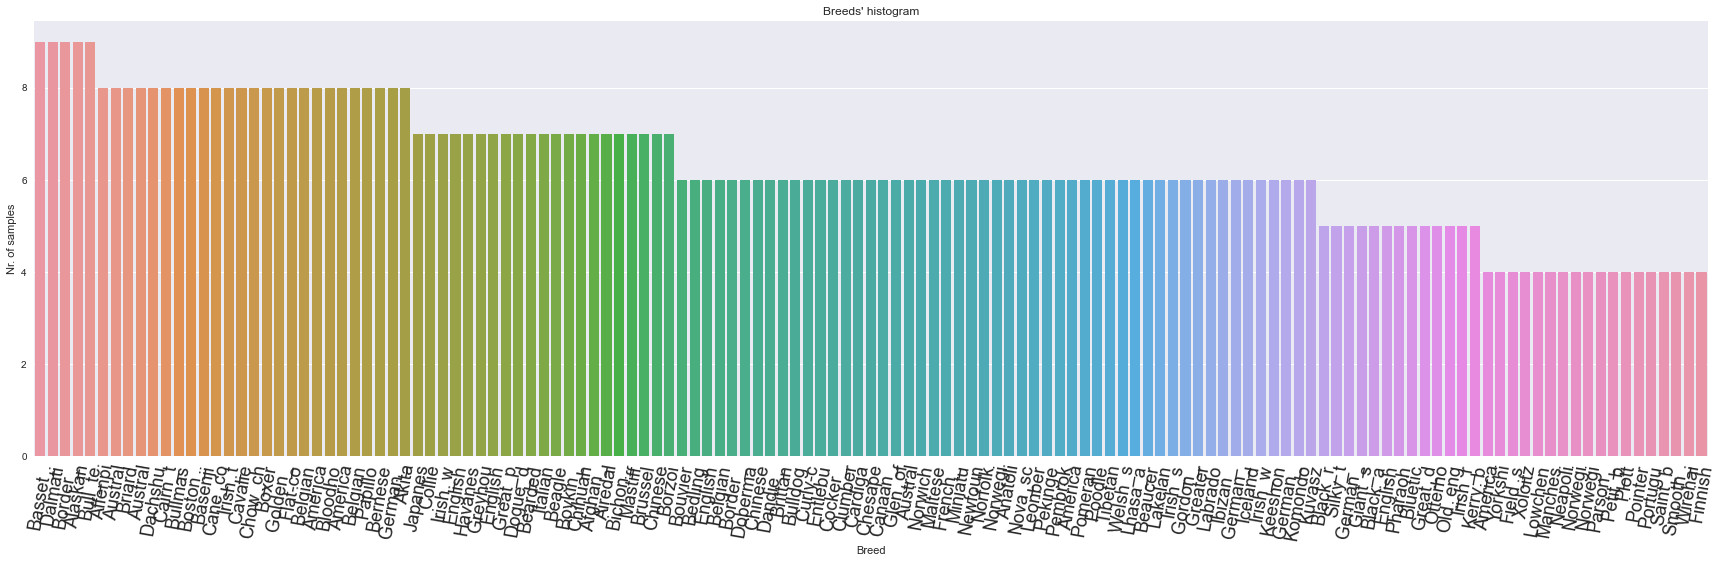

In [194]:
breed_histogram(valid, **args_figure)

### Test

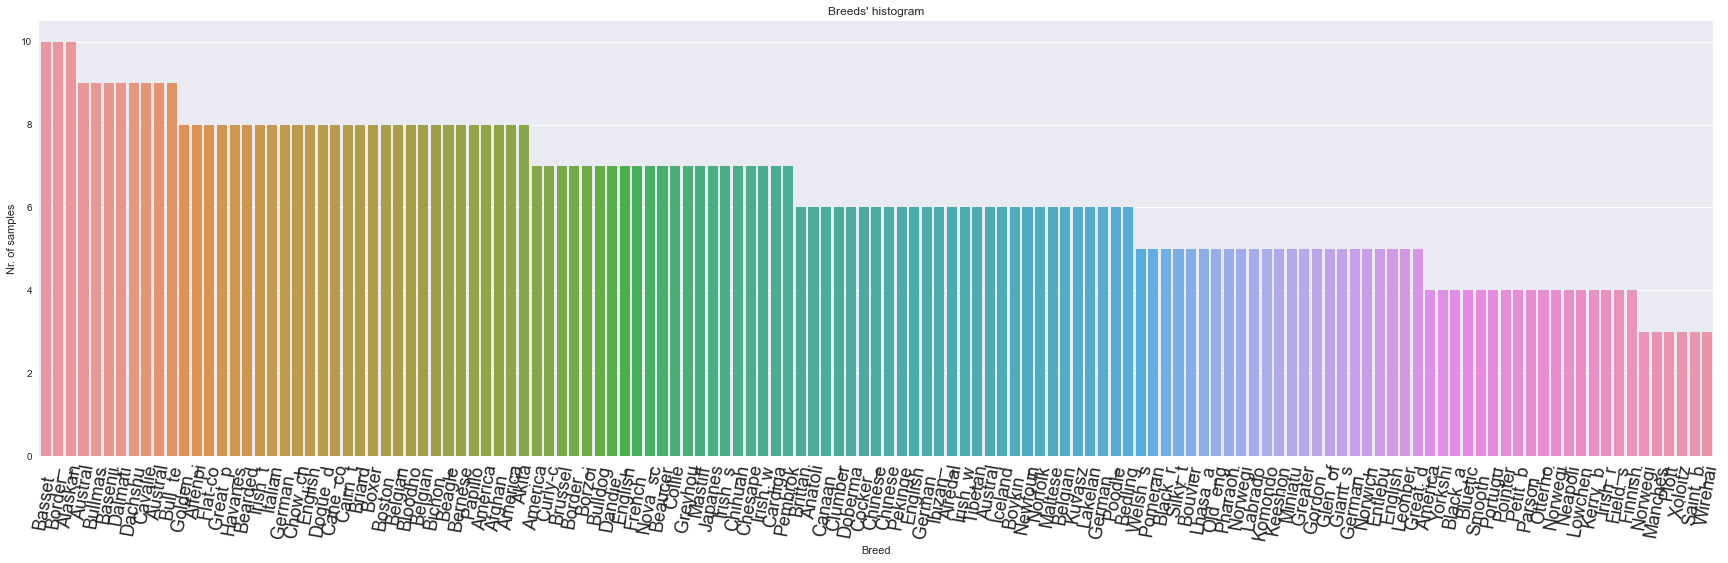

In [195]:
breed_histogram(test, **args_figure)